In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("tweet-sentiment-extraction\\train.csv")
data=data[["text","sentiment"]]
data.text=data.text.astype(str)
print(data.tail())

                                                    text sentiment
27476   wish we could come see u on Denver  husband l...  negative
27477   I`ve wondered about rake to.  The client has ...  negative
27478   Yay good for both of you. Enjoy the break - y...  positive
27479                         But it was worth it  ****.  positive
27480     All this flirting going on - The ATG smiles...   neutral


In [3]:
data=data[data.sentiment!="neutral"]

In [4]:
data['text'] = data['text'].str.lower()

C:\Users\jaina\anaconda3\envs\gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

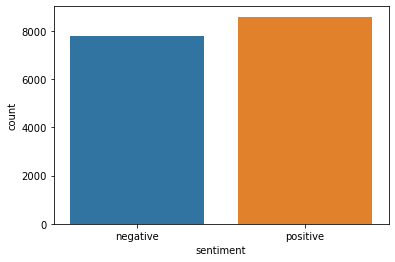

In [5]:
sns.countplot(data.sentiment)

C:\Users\jaina\anaconda3\envs\gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


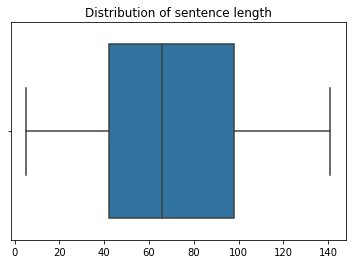

In [6]:
sen_length = [len(x) for x in data.text.tolist()]
sns.boxplot(sen_length)
plt.title('Distribution of sentence length')
plt.show()

In [7]:
contraction_dict = {"ain`t": "is not", "aren`t": "are not","can`t": "cannot", "`cause": "because", "could`ve": "could have", "couldn`t": "could not", "didn`t": "did not",  "doesn`t": "does not", "don`t": "do not", "hadn`t": "had not", "hasn`t": "has not", "haven`t": "have not", "he`d": "he would","he`ll": "he will", "he`s": "he is", "how`d": "how did", "how`d`y": "how do you", "how`ll": "how will", "how`s": "how is",  "I`d": "I would", "I`d`ve": "I would have", "I`ll": "I will", "I`ll`ve": "I will have","I`m": "I am", "I`ve": "I have", "i`d": "i would", "i`d`ve": "i would have", "i`ll": "i will",  "i`ll`ve": "i will have","i`m": "i am", "i`ve": "i have", "isn`t": "is not", "it`d": "it would", "it`d`ve": "it would have", "it`ll": "it will", "it`ll`ve": "it will have","it`s": "it is", "let`s": "let us", "ma`am": "madam", "mayn`t": "may not", "might`ve": "might have","mightn`t": "might not","mightn`t`ve": "might not have", "must`ve": "must have", "mustn`t": "must not", "mustn`t`ve": "must not have", "needn`t": "need not", "needn`t`ve": "need not have","o`clock": "of the clock", "oughtn`t": "ought not", "oughtn`t`ve": "ought not have", "shan`t": "shall not", "sha`n`t": "shall not", "shan`t`ve": "shall not have", "she`d": "she would", "she`d`ve": "she would have", "she`ll": "she will", "she`ll`ve": "she will have", "she`s": "she is", "should`ve": "should have", "shouldn`t": "should not", "shouldn`t`ve": "should not have", "so`ve": "so have","so`s": "so as", "this`s": "this is","that`d": "that would", "that`d`ve": "that would have", "that`s": "that is", "there`d": "there would", "there`d`ve": "there would have", "there`s": "there is", "here`s": "here is","they`d": "they would", "they`d`ve": "they would have", "they`ll": "they will", "they`ll`ve": "they will have", "they`re": "they are", "they`ve": "they have", "to`ve": "to have", "wasn`t": "was not", "we`d": "we would", "we`d`ve": "we would have", "we`ll": "we will", "we`ll`ve": "we will have", "we`re": "we are", "we`ve": "we have", "weren`t": "were not", "what`ll": "what will", "what`ll`ve": "what will have", "what`re": "what are",  "what`s": "what is", "what`ve": "what have", "when`s": "when is", "when`ve": "when have", "where`d": "where did", "where`s": "where is", "where`ve": "where have", "who`ll": "who will", "who`ll`ve": "who will have", "who`s": "who is", "who`ve": "who have", "why`s": "why is", "why`ve": "why have", "will`ve": "will have", "won`t": "will not", "won`t`ve": "will not have", "would`ve": "would have", "wouldn`t": "would not", "wouldn`t`ve": "would not have", "y`all": "you all", "y`all`d": "you all would","y`all`d`ve": "you all would have","y`all`re": "you all are","y`all`ve": "you all have","you`d": "you would", "you`d`ve": "you would have", "you`ll": "you will", "you`ll`ve": "you will have", "you`re": "you are", "you`ve": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
#replace_contractions("this`s a text with contraction")

In [8]:
data["text"]=data["text"].apply(lambda x:replace_contractions(str(x)))
print(data["text"])

1            sooo sad i will miss you here in san diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         sons of ****, why could not they put them on ...
6        2am feedings for the baby are fun when he is a...
                               ...                        
27475                                       enjoy ur night
27476     wish we could come see u on denver  husband l...
27477     i have wondered about rake to.  the client ha...
27478     yay good for both of you. enjoy the break - y...
27479                           but it was worth it  ****.
Name: text, Length: 16363, dtype: object


In [9]:
def remove_asterisk(text):
    return text.replace("****", 'shit')

In [10]:
data["text"]=data["text"].apply(lambda x:remove_asterisk(str(x)))
print(data["text"])

1            sooo sad i will miss you here in san diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         sons of shit, why could not they put them on ...
6        2am feedings for the baby are fun when he is a...
                               ...                        
27475                                       enjoy ur night
27476     wish we could come see u on denver  husband l...
27477     i have wondered about rake to.  the client ha...
27478     yay good for both of you. enjoy the break - y...
27479                           but it was worth it  shit.
Name: text, Length: 16363, dtype: object


In [11]:
def remove_url(text):
    text = re.sub(r"http\S+", "",text)
    return(text)

In [12]:
data["text"]=data["text"].apply(lambda x:remove_url(str(x)))

In [13]:
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z\s]' 
    return re.sub(pattern, '', text)

In [14]:
data["text"]=data["text"].apply(lambda x:remove_numbers(str(x)))
print(data["text"])

1               sooo sad i will miss you here in san diego
2                                   my boss is bullying me
3                            what interview leave me alone
4         sons of shit why could not they put them on t...
6        am feedings for the baby are fun when he is al...
                               ...                        
27475                                       enjoy ur night
27476     wish we could come see u on denver  husband l...
27477     i have wondered about rake to  the client has...
27478     yay good for both of you enjoy the break  you...
27479                            but it was worth it  shit
Name: text, Length: 16363, dtype: object


In [15]:
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z\s]' 
    return re.sub(pat, '', text)

In [16]:
data["text"]=data["text"].apply(lambda x:remove_special_characters(str(x)))

In [17]:
def remove_under(text):
    text.replace("_","")
    text.replace("`","")

In [18]:
#data["text"]=data["text"].apply(lambda x:remove_under(str(x)))

In [19]:
data.to_csv("tweet-sentiment-extraction\\try.csv")

In [20]:
from keras.preprocessing.text import Tokenizer
## Tokenize the sentences
tokenizer = Tokenizer( num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ",
    char_level=False,
    oov_token=None,
    document_count=0)
tokenizer.fit_on_texts(list(data['text']))
train_X = tokenizer.texts_to_sequences(data['text'])


Using TensorFlow backend.


In [21]:
print(train_X)
print("word_index : ",tokenizer.word_index)

[[339, 88, 1, 32, 70, 7, 96, 12, 1374, 2316], [6, 1308, 5, 7099, 18], [56, 956, 362, 18, 436], [4789, 16, 42, 118, 110, 10, 71, 334, 124, 19, 3, 4790, 51, 186, 554], [13, 7100, 11, 3, 274, 27, 83, 78, 87, 5, 29, 1852, 9, 7101], [1853, 208, 57, 21, 2317, 2603, 555, 5, 15, 1245], [1, 47, 47, 36, 3, 266, 34, 893, 122, 957, 1854], [6, 7102, 5, 519, 7103, 995, 19, 7104], [1, 91, 2, 45, 2, 277, 113, 26, 1, 256, 6, 958], [1855, 75, 1, 13, 2054], [31, 188, 222, 2, 3666, 7105, 85, 51, 1713, 515], [1, 14, 108, 148, 11, 3, 680, 365, 159, 9, 4791, 6, 343, 214, 4792, 84, 1, 422, 14, 4, 1582, 19, 8, 74, 184], [5, 67, 93, 35, 121, 70, 378, 54], [423, 3008, 529, 5, 47, 508, 3, 81, 1246, 27, 7106, 1583, 9, 7107, 11, 1470, 252, 60, 151, 2, 14, 4, 3667, 1583], [3, 373, 7108, 996, 19, 6, 778, 5, 83, 58, 1584], [1, 13, 101], [19, 3, 138, 2, 7109, 418, 1375, 2, 1471], [1856, 419, 7110, 53, 7111, 212, 59, 3668, 83, 38, 61, 805, 108, 38, 61, 12, 4, 1137, 7112], [233, 2, 126, 9, 61, 5, 4, 1081, 623, 12, 7113, 

In [22]:
for i,f in enumerate(train_X):
    if(len(f)==0):
        print(i)

In [23]:
embeddings_index = dict()
f = open('glove.42B.300d.txt', encoding="utf8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.array(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1917494 word vectors.


In [24]:
vocab_size = len(tokenizer.word_index) + 1
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [25]:
print(len(train_X))
print('Maximum review length: {}'.format(len(max((train_X), key=len))))

16363
Maximum review length: 33


In [26]:
from keras.preprocessing import sequence
max_words = 33
X = sequence.pad_sequences(train_X, maxlen=max_words,padding='post')

In [27]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense,Flatten

model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=33, trainable=False)
model.add(e)
model.add(LSTM(100))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 300)           5681100   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 5,841,601
Trainable params: 160,501
Non-trainable params: 5,681,100
_________________________________________________________________


In [28]:
data.sentiment = data.sentiment.map({"positive":1,"negative":0})
print(data.sentiment)

1        0
2        0
3        0
4        0
6        1
        ..
27475    1
27476    0
27477    0
27478    1
27479    1
Name: sentiment, Length: 16363, dtype: int64


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X,data["sentiment"], epochs=3,batch_size=None,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 13090 samples, validate on 3273 samples
Epoch 1/3
13090/13090 [==============================] - 13s 995us/step - loss: 0.3831 - accuracy: 0.8228 - val_loss: 0.3026 - val_accuracy: 0.8766
Epoch 2/3
13090/13090 [==============================] - 12s 942us/step - loss: 0.2744 - accuracy: 0.8922 - val_loss: 0.2660 - val_accuracy: 0.8989
Epoch 3/3
13090/13090 [==============================] - 12s 930us/step - loss: 0.2395 - accuracy: 0.9074 - val_loss: 0.2541 - val_accuracy: 0.8989
